# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [7]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import scipy
# matplotlib inline

### Reading the Mosaic Image

In [8]:
IMG_DIR = 'images/'
IMG_NAME = 'crayons.bmp'
mosaic_img = read_image(IMG_DIR+"/"+IMG_NAME)# YOUR CODE HERE

In [3]:
def read_image(IMG_NAME):
    # YOUR CODE HERE
    img = cv2.imread(IMG_NAME)
    # img[0::2, 0::2, 0:2] = 0  # make row 1 red
    # img[0::2, 1::2, 0::2] = 0 # make row 1 green
    # img[1::2, 0::2, 0::2] = 0 # make row 2 green
    # img[1::2, 1::2, 1:3] = 0  # make row 2 blue
    return img

(-0.5, 599.5, 479.5, -0.5)

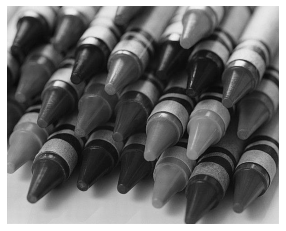

In [87]:
# For a sanity check, display your image here
plt.imshow(cv2.cvtColor(mosaic_img, cv2.COLOR_BGR2RGB))
plt.axis('off')


### Linear Interpolation

In [ ]:
### HINT : You might want to use filters

In [ ]:
### HINT : To use filters you might want to write your kernels

In [ ]:
### HINT : For writing your kernels you might want to see the RGB Pattern provided on the website

In [ ]:
### HINT : To improve your kernels, you might want to use the squared difference 
###        between your solution image and the original image

In [4]:
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    from scipy.ndimage import convolve
    mosaic_shape = np.shape(mosaic_img)
    soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    mosaic_img[0::2, 0::2, 0:2] = 0  # make row 1 red
    mosaic_img[0::2, 1::2, 0::2] = 0 # make row 1 green
    mosaic_img[1::2, 0::2, 0::2] = 0 # make row 2 green
    mosaic_img[1::2, 1::2, 1:3] = 0  # make row 2 blue
    # split color channels   
    B, G, R = np.split(mosaic_img, 3, axis=-1)
    kernel_R = np.array([[0.25,0.5,0.25],
                         [0.5, 1, 0.5],
                         [0.25, 0.5, 0.25]])
    kernel_G = np.array([[0, 0.25, 0], 
                         [0.25, 1, 0.25],
                         [0, 0.25, 0]])
    kernel_B = kernel_R
    soln_R = convolve(np.squeeze(R), kernel_R, mode="mirror")
    soln_G = convolve(np.squeeze(G), kernel_G, mode="mirror")
    soln_B = convolve(np.squeeze(B), kernel_B, mode="mirror")
    soln_image[:, :, 0] = soln_B
    soln_image[:, :, 1] = soln_G
    soln_image[:, :, 2] = soln_R
    soln_image = soln_image.astype(np.uint8)
    soln_image = np.clip(soln_image, 0, 255)
    return soln_image

In [5]:
def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    diff = np.square(soln_image - original_image).sum(axis=-1)
    # plt.hist(np.ravel(diff), 100) # draw error distribution 
    # plt.show()
    pp_err = np.mean(diff)
    max_err = np.max(diff)
    # norm diff for visualization
    min_err = np.min(diff)
    norm_diff = (diff - min_err)/(max_err-min_err) * 255
    norm_diff = norm_diff.astype(np.uint8)
    plt.imshow(norm_diff)
    plt.axis('off')
    return pp_err, max_err, norm_diff

We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

(-0.5, 1199.5, 479.5, -0.5)

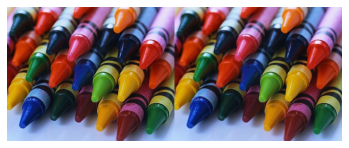

In [163]:
mosaic_img = read_image(IMG_DIR+"/"+'crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+"/"+'crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE
comp_img = np.concatenate([original_image, soln_image], axis=1)
plt.imshow(cv2.cvtColor(comp_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

The average per-pixel error for crayons is: 43.503166666666665
The maximum per-pixel error for crayons is: 498


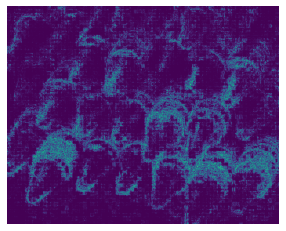

In [176]:
pp_err, max_err, diff_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

(-0.5, 299.5, 99.5, -0.5)

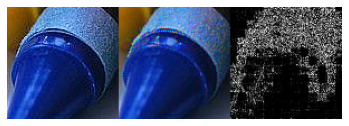

In [139]:
# zoom up for artifcacts
window = [300,400,50,150]
ori_patch = original_image[window[0]:window[1], window[2]:window[3]]
soln_path = soln_image[window[0]:window[1], window[2]:window[3]]
diff_patch = diff_map[window[0]:window[1], window[2]:window[3]]
diff_patch = np.repeat(np.expand_dims(diff_patch, axis=-1), 3, axis=-1)
vis = np.concatenate([ori_patch,soln_path,diff_patch], axis=1)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 4763.5, 1439.5, -0.5)

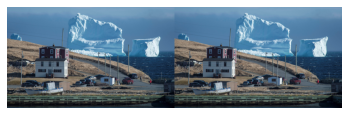

In [177]:
mosaic_img = read_image(IMG_DIR+"/"+'iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+"/"+'iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE
comp_img = np.concatenate([original_image, soln_image], axis=1)
plt.imshow(cv2.cvtColor(comp_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

The average per-pixel error for iceberg is: 44.33736239388003
The maximum per-pixel error for iceberg is: 651


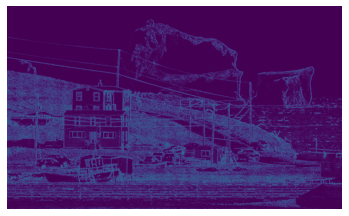

In [178]:
pp_err, max_err, diff_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

(-0.5, 299.5, 99.5, -0.5)

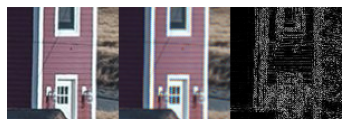

In [153]:
window = [650,750,800,900]
ori_patch = original_image[window[0]:window[1], window[2]:window[3]]
soln_path = soln_image[window[0]:window[1], window[2]:window[3]]
diff_patch = diff_map[window[0]:window[1], window[2]:window[3]]
diff_patch = np.repeat(np.expand_dims(diff_patch, axis=-1), 3, axis=-1)
vis = np.concatenate([ori_patch,soln_path,diff_patch], axis=1)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 2399.5, 799.5, -0.5)

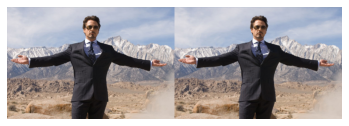

In [179]:
mosaic_img = read_image(IMG_DIR+"/"+'tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+"/"+'tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
comp_img = np.concatenate([original_image, soln_image], axis=1)
plt.imshow(cv2.cvtColor(comp_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

The average per-pixel error for tony is: 15.134258333333333
The maximum per-pixel error for tony is: 533


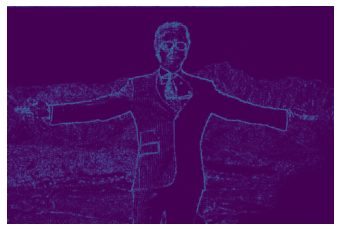

In [180]:
pp_err, max_err, diff_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

(-0.5, 299.5, 99.5, -0.5)

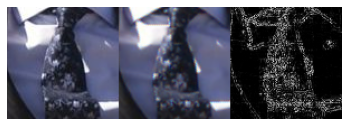

In [156]:
window = [250,350,550,650]
ori_patch = original_image[window[0]:window[1], window[2]:window[3]]
soln_path = soln_image[window[0]:window[1], window[2]:window[3]]
diff_patch = diff_map[window[0]:window[1], window[2]:window[3]]
diff_patch = np.repeat(np.expand_dims(diff_patch, axis=-1), 3, axis=-1)
vis = np.concatenate([ori_patch,soln_path,diff_patch], axis=1)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 969.5, 723.5, -0.5)

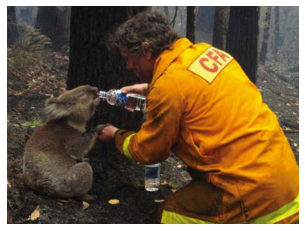

In [157]:
mosaic_img = read_image(IMG_DIR+"/"+'hope.bmp')
soln_image = get_solution_image(mosaic_img)
# Generate your solution image here and show it 
plt.imshow(cv2.cvtColor(soln_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [9]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
    from scipy.signal import medfilt2d
    soln_img = get_solution_image(mosaic_img)
    freeman_soln_image = soln_img.copy()
    soln_img = soln_img.astype(np.float)
    modi_R = medfilt2d(soln_img[:, :, 2]-soln_img[:, :, 1], kernel_size=(3,3))
    modi_B = medfilt2d(soln_img[:, :, 0]-soln_img[:, :, 1], kernel_size=(3,3))
    R, B = modi_R + soln_img[:, :, 1], modi_B + soln_img[:, :, 1]
    freeman_soln_image[:, :, 0] = B
    freeman_soln_image[:, :, 2] = R
    freeman_soln_image = freeman_soln_image.astype(np.uint8)
    freeman_soln_image = np.clip(freeman_soln_image, 0, 255)
    return freeman_soln_image

(-0.5, 2399.5, 799.5, -0.5)

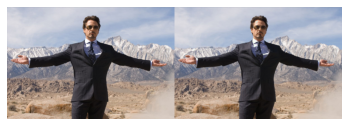

In [251]:
mosaic_img = read_image(IMG_DIR+"/"+'tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+"/"+'tony.jpg')
# For sanity check display your solution image here
### YOUR CODE
comp_img = np.concatenate([original_image, soln_image], axis=1)
plt.imshow(cv2.cvtColor(comp_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

The average per-pixel error for tony is: 11.887694791666666
The maximum per-pixel error for tony is: 678


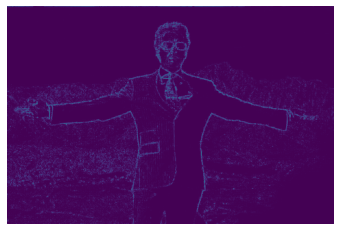

In [252]:
pp_err, max_err, diff_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

(-0.5, 299.5, 99.5, -0.5)

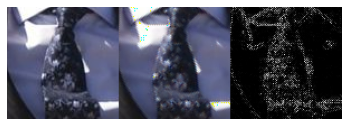

In [253]:
### Feel free to play around with other images for Freeman's method above ###
window = [250,350,550,650]
ori_patch = original_image[window[0]:window[1], window[2]:window[3]]
soln_path = soln_image[window[0]:window[1], window[2]:window[3]]
diff_patch = diff_map[window[0]:window[1], window[2]:window[3]]
diff_patch = np.repeat(np.expand_dims(diff_patch, axis=-1), 3, axis=-1)
vis = np.concatenate([ori_patch,soln_path,diff_patch], axis=1)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 1199.5, 479.5, -0.5)

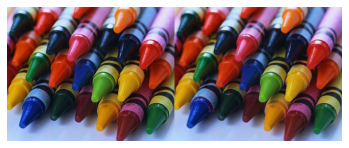

In [254]:
mosaic_img = read_image(IMG_DIR+"/"+'crayons.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+"/"+'crayons.jpg')
# For sanity check display your solution image here
### YOUR CODE
comp_img = np.concatenate([original_image, soln_image], axis=1)
plt.imshow(cv2.cvtColor(comp_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

The average per-pixel error for crayons is: 39.90243402777778
The maximum per-pixel error for crayons is: 702


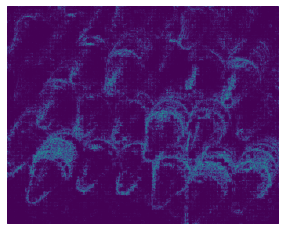

In [255]:
pp_err, max_err, diff_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

(-0.5, 299.5, 99.5, -0.5)

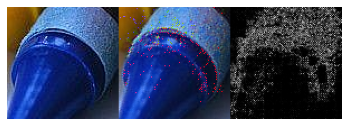

In [256]:
window = [300,400,50,150]
ori_patch = original_image[window[0]:window[1], window[2]:window[3]]
soln_path = soln_image[window[0]:window[1], window[2]:window[3]]
diff_patch = diff_map[window[0]:window[1], window[2]:window[3]]
diff_patch = np.repeat(np.expand_dims(diff_patch, axis=-1), 3, axis=-1)
vis = np.concatenate([ori_patch,soln_path,diff_patch], axis=1)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 4763.5, 1439.5, -0.5)

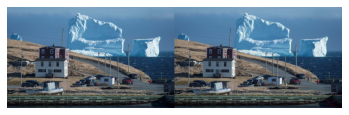

In [257]:
mosaic_img = read_image(IMG_DIR+"/"+'iceberg.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+"/"+'iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE
comp_img = np.concatenate([original_image, soln_image], axis=1)
plt.imshow(cv2.cvtColor(comp_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

The average per-pixel error for crayons is: 37.28066663168206
The maximum per-pixel error for crayons is: 739


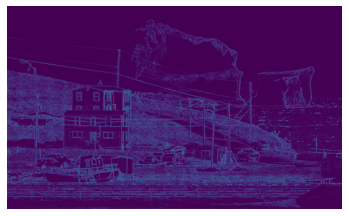

In [258]:
pp_err, max_err, diff_map = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

(-0.5, 299.5, 99.5, -0.5)

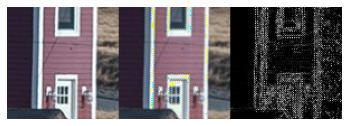

In [259]:
window = [650,750,800,900]
ori_patch = original_image[window[0]:window[1], window[2]:window[3]]
soln_path = soln_image[window[0]:window[1], window[2]:window[3]]
diff_patch = diff_map[window[0]:window[1], window[2]:window[3]]
diff_patch = np.repeat(np.expand_dims(diff_patch, axis=-1), 3, axis=-1)
vis = np.concatenate([ori_patch,soln_path,diff_patch], axis=1)
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis('off')

(-0.5, 969.5, 723.5, -0.5)

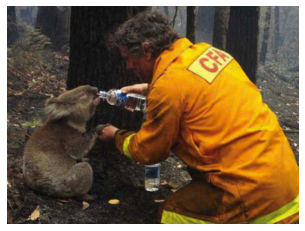

In [260]:
mosaic_img = read_image(IMG_DIR+"/"+'hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
# Generate your solution image here and show it
plt.imshow(cv2.cvtColor(soln_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

### Mosaicing an Image

Now lets take a step backwards and mosaic an image.

In [11]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
    # original_image[0::2, 0::2, 0:2] = 0  # make row 1 red
    # original_image[0::2, 1::2, 0::2] = 0 # make row 1 green
    # original_image[1::2, 0::2, 0::2] = 0 # make row 2 green
    # original_image[1::2, 1::2, 1:3] = 0  # make row 2 blue
    weight = np.zeros_like(original_image)
    weight[0::2, 0::2, 2] = 1
    weight[1::2, 1::2, 0] = 1
    weight[0::2, 1::2, 1] = 1
    weight[1::2, 0::2, 1] = 1
    original_image = original_image * weight 
    mosaic_img = np.sum(original_image, axis=-1).astype(np.uint8)
    return mosaic_img

The average per-pixel error for crayons is: 0.76174375
The maximum per-pixel error for crayons is: 507


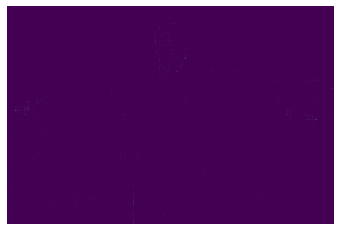

In [299]:
### YOU CAN USE ANY OF THE PROVIDED IMAGES TO CHECK YOUR get_mosaic_function
mosaic_img = read_image(IMG_DIR+"/"+'tony.bmp')
original_image = read_image(IMG_DIR+"/"+'tony.jpg')
gen_mosaic_img = get_mosaic_image(original_image)
gen_mosaic_img = cv2.cvtColor(gen_mosaic_img, cv2.COLOR_GRAY2BGR)
# For sanity check display your solution image here
### YOUR CODE
pp_err, max_err, diff_map = compute_errors(mosaic_img, gen_mosaic_img)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

Use any 3 images you find interesting and generate their mosaics as well as their demosaics. Try to find images that break your demosaicing function.

(-0.5, 699.5, 349.5, -0.5)

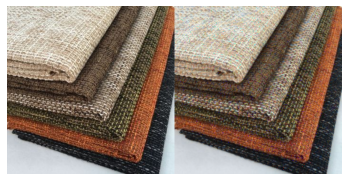

In [324]:
### YOUR CODE HERE ###
orig_image = read_image(IMG_DIR+"/"+'towel.jpg')
mo_img = get_mosaic_image(orig_image) # get mosaic image
mo_img = cv2.cvtColor(mo_img, cv2.COLOR_GRAY2BGR)
soln_image = get_freeman_solution_image(mo_img)
comp_img = np.concatenate([orig_image, soln_image], axis=1)
plt.imshow(cv2.cvtColor(comp_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

The average per-pixel error for crayons is: 156.45942040816325
The maximum per-pixel error for crayons is: 723


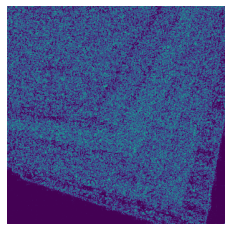

In [325]:
pp_err, max_err, diff_map = compute_errors(orig_image, soln_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

(-0.5, 2599.5, 865.5, -0.5)

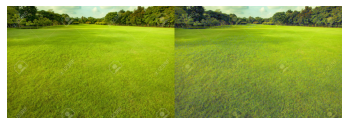

In [366]:
### YOUR CODE HERE ###
orig_image = read_image(IMG_DIR+"/"+'grass.jpg')
mo_img = get_mosaic_image(orig_image) # get mosaic image
mo_img = cv2.cvtColor(mo_img, cv2.COLOR_GRAY2BGR)
soln_image = get_freeman_solution_image(mo_img)
comp_img = np.concatenate([orig_image, soln_image], axis=1)
plt.imshow(cv2.cvtColor(comp_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

The average per-pixel error for crayons is: 126.35500977082964
The maximum per-pixel error for crayons is: 747


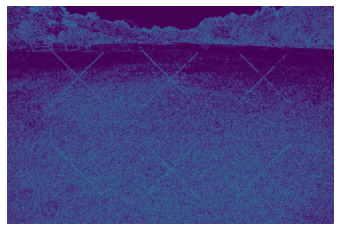

In [367]:
pp_err, max_err, diff_map = compute_errors(orig_image, soln_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

### Bonus Points

In [98]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####
def get_solution_image_with_big_kernel(mosaic_img):
    # refer: http://web.stanford.edu/class/ee367/reading/Demosaicing_ICASSP04.pdf
    from scipy.ndimage import convolve
    mosaic_shape = np.shape(mosaic_img)
    soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    mosaic_img[0::2, 0::2, 0:2] = 0  # make row 1 red
    mosaic_img[0::2, 1::2, 0::2] = 0 # make row 1 green
    mosaic_img[1::2, 0::2, 0::2] = 0 # make row 2 green
    mosaic_img[1::2, 1::2, 1:3] = 0  # make row 2 blue
    # split color channels   
    B, G, R = np.split(mosaic_img, 3, axis=-1)
    B, G, R = B.astype(np.float), G.astype(np.float), R.astype(np.float)
    G_R_row, G_B_row = G.copy(), G.copy()
    G_R_row[1::2, :, :] = 0
    G_B_row[0::2, :, :] = 0
    kernel_RatG_RB_G = np.array([[0, 0, 0.5, 0, 0], 
                                 [0, -1, 0, -1, 0],
                                 [-1, 0, 5, 0, -1],
                                 [0, -1, 0, -1, 0],
                                 [0, 0, 0.5, 0, 0]])/5
    kernel_BatG_BR_G = kernel_RatG_RB_G
    kernel_RatB_BB_B = np.array([[0, 0, -1.5, 0, 0], 
                                 [0, 0, 0, 0, 0],
                                 [-1.5, 0, 6, 0, -1.5],
                                 [0, 0, 0, 0, 0],
                                 [0, 0, -1.5, 0, 0]])/6
    kernel_BatR_RR_R = kernel_RatB_BB_B
    kernel_GatR_R = np.array([[0, 0, -1, 0, 0], 
                            [0, 0, 0, 0, 0],
                            [-1, 0, 4, 0, -1],
                            [0, 0, 0, 0, 0],
                            [0, 0, -1, 0, 0]]) /4
                            
    kernel_R = np.array([[0.25,0.5,0.25],
                         [0.5, 1, 0.5],
                         [0.25, 0.5, 0.25]])
    kernel_G = np.array([[0, 0.25, 0], 
                         [0.25, 1, 0.25],
                         [0, 0.25, 0]])
    kernel_B = kernel_R
    alpha = 1/2
    beta = 5/8
    gamma = 3/4
    # compute G
    soln_G = convolve(np.squeeze(G), kernel_G, mode="mirror")
    delta_GR = convolve(np.squeeze(R), kernel_GatR_R, mode='mirror')
    soln_G = soln_G + (alpha * delta_GR)
    # compute R 
    soln_R = convolve(np.squeeze(R), kernel_R, mode="mirror")
    delta_RB = convolve(np.squeeze(B), kernel_RatB_BB_B, mode="mirror")
    soln_R = soln_R + gamma * delta_RB
    delta_RG_RB = convolve(np.squeeze(G), kernel_RatG_RB_G, mode="mirror")
    soln_R = soln_R + beta * delta_RG_RB
    # compute B
    soln_B = convolve(np.squeeze(B), kernel_B, mode="mirror")
    delta_BR = convolve(np.squeeze(R), kernel_BatR_RR_R, mode="mirror")
    soln_B = soln_B + gamma * delta_BR
    delta_BG_BR = convolve(np.squeeze(G), kernel_BatG_BR_G, mode="mirror")
    soln_B = soln_B + beta * delta_BG_BR
    
    soln_image[:, :, 0] = soln_B
    soln_image[:, :, 1] = soln_G
    soln_image[:, :, 2] = soln_R
    soln_image = soln_image.astype(np.uint8)
    soln_image = np.clip(soln_image, 0, 255)
    return soln_image

(-0.5, 2599.5, 865.5, -0.5)

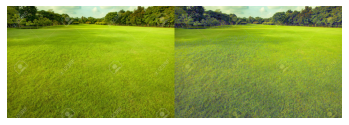

In [101]:
orig_image = read_image(IMG_DIR+"/"+'grass.jpg')
mo_img = get_mosaic_image(orig_image) # get mosaic image
mo_img = cv2.cvtColor(mo_img, cv2.COLOR_GRAY2BGR)
soln_image = get_solution_image_with_big_kernel(mo_img)
comp_img = np.concatenate([orig_image, soln_image], axis=1)
plt.imshow(cv2.cvtColor(comp_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

The average per-pixel error for crayons is: 106.309925
The maximum per-pixel error for crayons is: 490


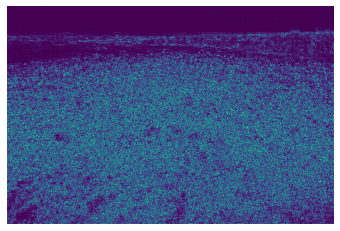

In [100]:
pp_err, max_err, diff_map = compute_errors(orig_image, soln_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))